# **CTF와 TAF**

- CTF와 TAF는 서로 상반된 개념이 아님.
- RAC를 구성하면 CTF가 기본적으로 설정되어 있는 상태에서, failover 시 기존 세션이 끊기지 않고 다른 인스턴스로 넘어가도록 하기 위해 추가로 TAF를 설정해주는 것.



# **CTF(CTF(Connection Time FailOver)**


**기본 개념**

- 데이터베이스로 접속하는 순간에 Server, DB, Listener등이 비정상적일 경우에 다른 쪽 Server로 접속하는 것을 말한다.
-  DB에 대한 query가 진행 중에 해당 DB에 오류가 발생하거나 비정상 동작이 발생할 경우 커넥션을 버리고 정상적인 DB로 커넥션을 맺는다.
-  JEUS에서 data-source를 설정할 경우 check query를 설정해 줘야 한다.

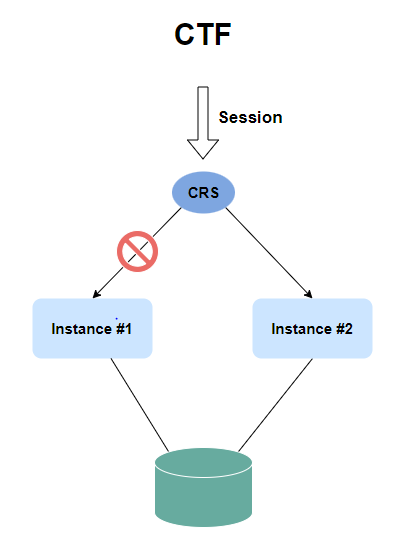

- RAC를 구성하면 기본적으로 설정.
- 신규 세션에 대해서 다른 인스턴스로 넘겨줌.
- 기존 세션은 끊어짐.


# **TAF(Run Time FailOver)**


**기본개념**

- DB에 대한 query가 진행 중에 해당 DB에 오류가 발생하거나 비정상 동작이 발생할 경우 옵션에 따라 각각의 동작을 취한다.
- TAF는 CTF와 상반되는 개념이 아니라, CTF에 대해 additional 한 개념. 따라서 CTF동작과 옵션은 기본적으로 TAF에서도 적용.
- check-query 및 check-query-timeout은 필수적이지는 않다. 그러나 설정한다면 TAF기능이 비정상적으로 동작할 시에도 fail over가 수행되는 장점.
- Package의 global 변수, Alter session을 이용한 작업, 진행중인 Transaction, Temporary table data등은 TAF 사용시에도 보장되지 못한다. 따라서 TAF를 사용함에 있어서 충분한 고려가 필요.



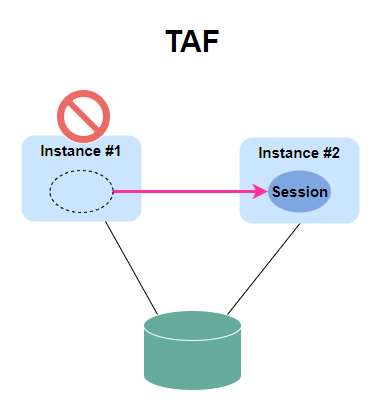

- 별도로 설정을 해주어야 함.
- 기존 세션을 다른 인스턴스로 넘겨줌.
- 사용자 입장에서는 잠깐 멈춤 현상을 경험할 순 있지만 지속적으로 사용이 가능.

**TYPE**

- NONE: TAF를 사용하지 않음.
- SESSION: fetch 도중 장애 발생 시 복구가 불가능. SQL을 다시 실행해야 함
- SELECT: fetch 도중 장애 발생 시 복구가 가능.

**METHOD**

- BASIC: failover 되면 Server Process가 동작
- PRECONNECT: failover 되기 전부터 Server Process가 동작. failover가 빠르지만, 평소에 자원 낭비.

**DELAY(선택 옵션)**

- 인스턴스 장애 후에 BACKUP Session에 연결하려는 동안 기다리는 몇 초간의 지연 시간. (Default :1초)

**RETRIES(선택 옵션)**

- 인스턴스 장애 후에 BACKUP Session에 연결하기 위해 시도하는 횟수 (DEFAULT :5초)